In [2]:
import sklearn
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go

import cufflinks as cf
import matplotlib.pyplot as plt
import os
from sklearn.metrics import accuracy_score
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, plot,iplot

In [3]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
heart= pd.read_csv("heart.csv",na_values=["NA",'?'])

In [5]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart.shape

(303, 14)

In [14]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(heart.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [15]:
heart["target"]

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [19]:
heart["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [20]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [21]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [23]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [24]:
heart["target"].unique()

array([1, 0], dtype=int64)

# Data Visualization

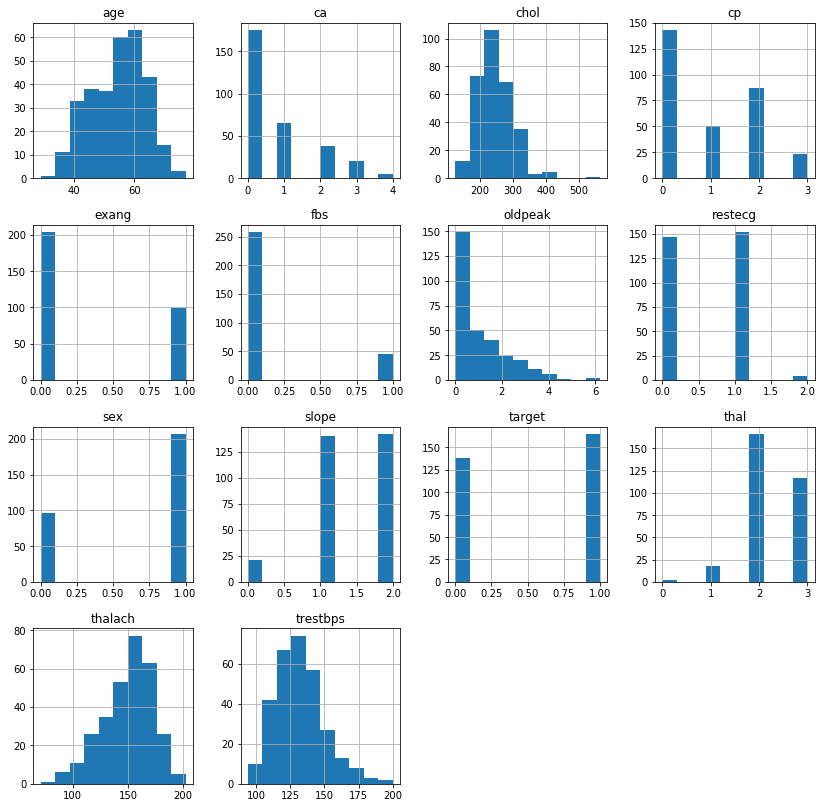

In [27]:
heart.hist(figsize=(14,14))
plt.show()

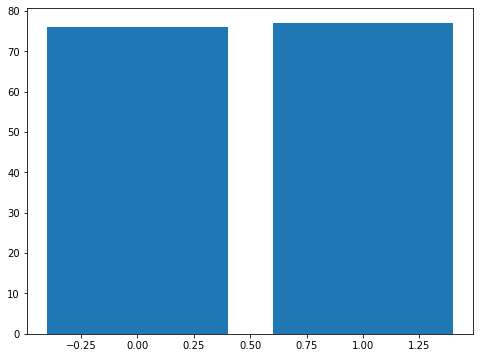

In [38]:
plt.figure(figsize=(8,6))
plt.bar(x=heart["sex"],height=heart["age"])
plt.show()

<IPython.core.display.Javascript object>

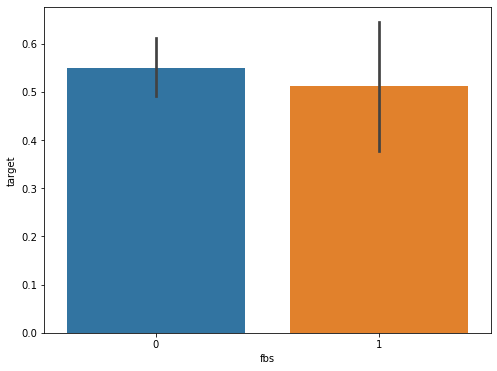

In [37]:
plt.figure(figsize=(8,6))
sns.barplot(x="fbs",y="target",data=heart)
plt.show()

<IPython.core.display.Javascript object>

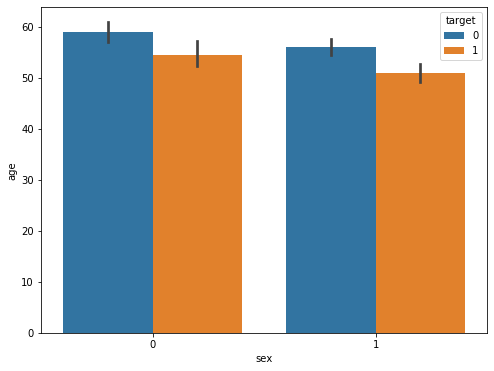

In [36]:
plt.figure(figsize=(8,6))
sns.barplot(x=heart["sex"],y=heart["age"],hue=heart["target"])
plt.show()

<IPython.core.display.Javascript object>

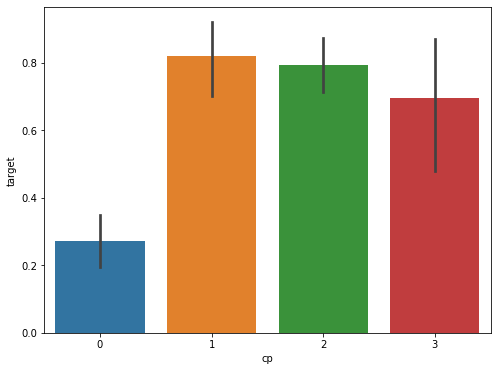

In [40]:
plt.figure(figsize=(8,6))
sns.barplot(x=heart["cp"],y=heart["target"])
plt.show()
# cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic

<IPython.core.display.Javascript object>

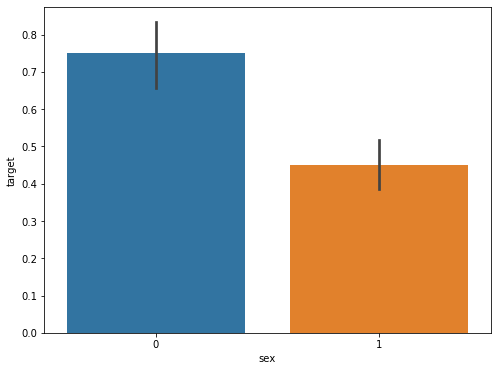

In [46]:
plt.figure(figsize=(8,6))
sns.barplot(x=heart["sex"],y=heart["target"])
plt.show()

In [48]:
px.bar(heart,x=heart["sex"],y=heart["target"])

<IPython.core.display.Javascript object>

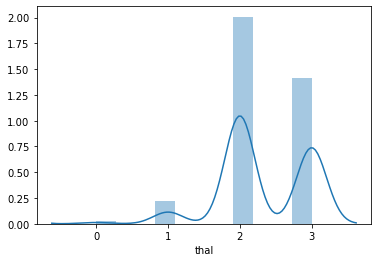

In [49]:
sns.distplot(heart["thal"])

<IPython.core.display.Javascript object>

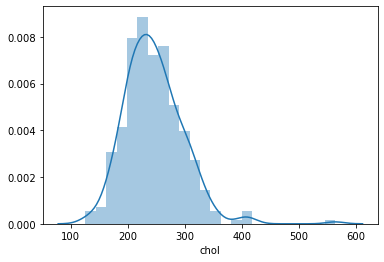

In [50]:
sns.distplot(heart["chol"])

In [ ]:
sns.pairplot(heart)

In [ ]:
heart

In [71]:
num_features= [features for features in heart.columns if heart[features].dtype!="O" and heart[features].unique().sum()>10]
print("Numeric Features in dataset are : ")
list(heart[num_features].columns)

Numeric Features in dataset are : 


['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

<IPython.core.display.Javascript object>

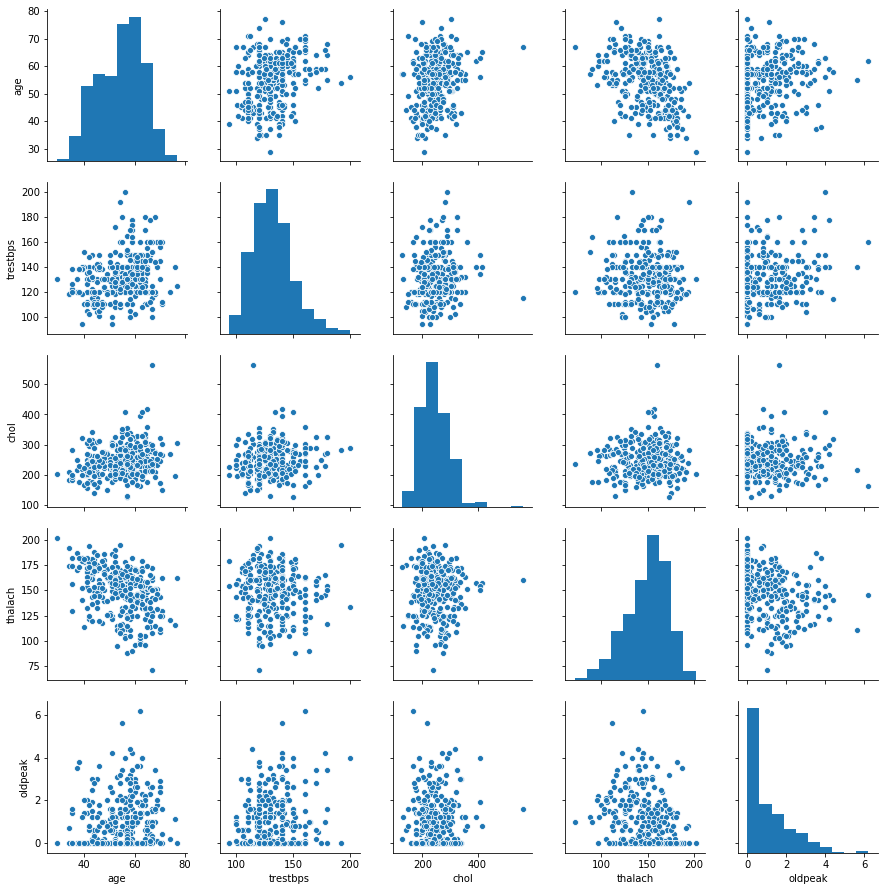

In [72]:
sns.pairplot(heart[num_features])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

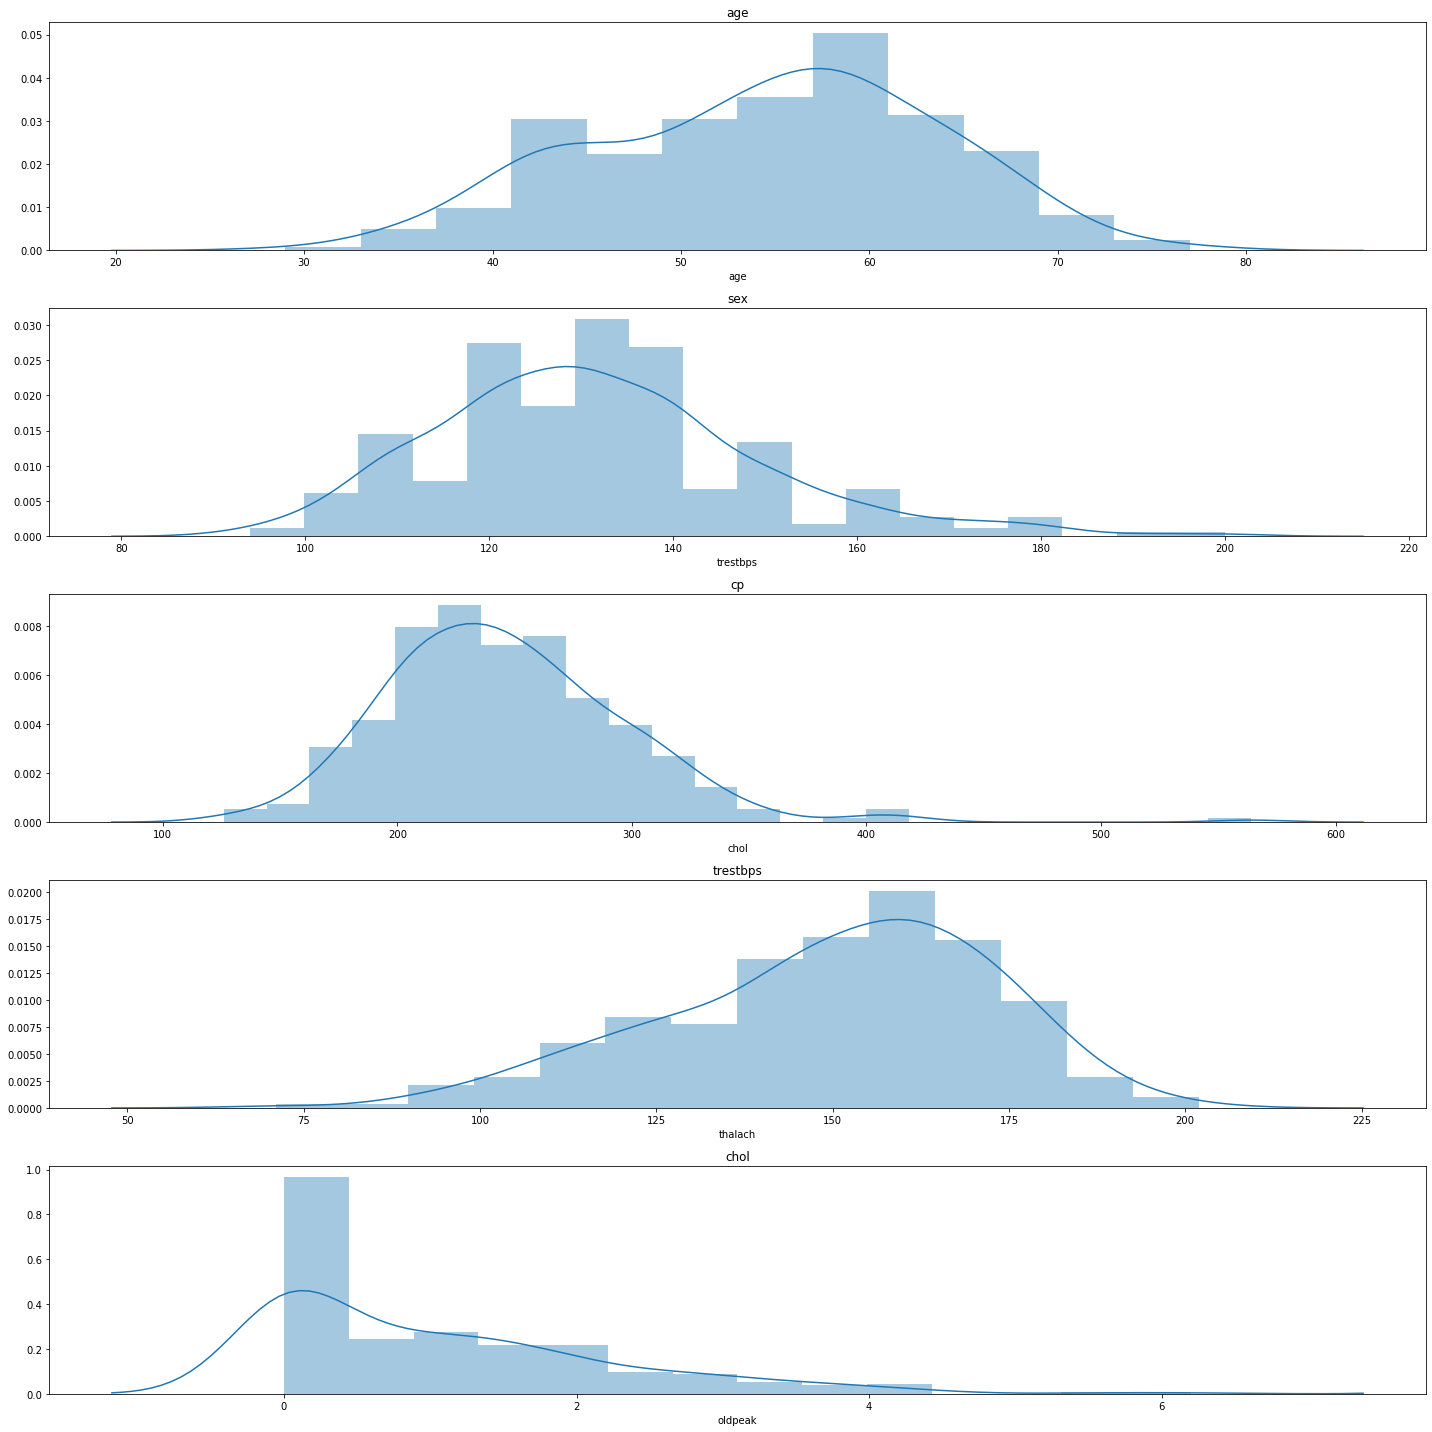

In [95]:
plt.figure(figsize=(20,20))
index=0
for i in range(len(num_features)):
    plt.subplot(5,1,i+1)
    sns.distplot(heart[num_features[index]])
    plt.title(heart.columns[i])
    index+=1
plt.tight_layout()    

1    165
0    138
Name: target, dtype: int64


<IPython.core.display.Javascript object>

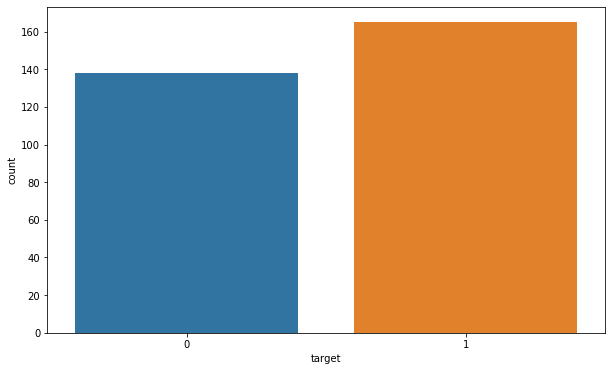

In [91]:
plt.figure(figsize=(10,6))
y= heart["target"]
print(y.value_counts())
sns.countplot(y)
plt.show()

<IPython.core.display.Javascript object>

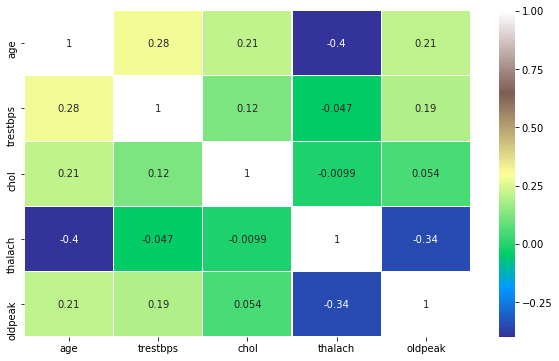

In [101]:
plt.figure(figsize=(10,6))
sns.heatmap(heart[num_features].corr(),annot=True,cmap="terrain",linewidth=0.1)
fig=plt.gcf()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

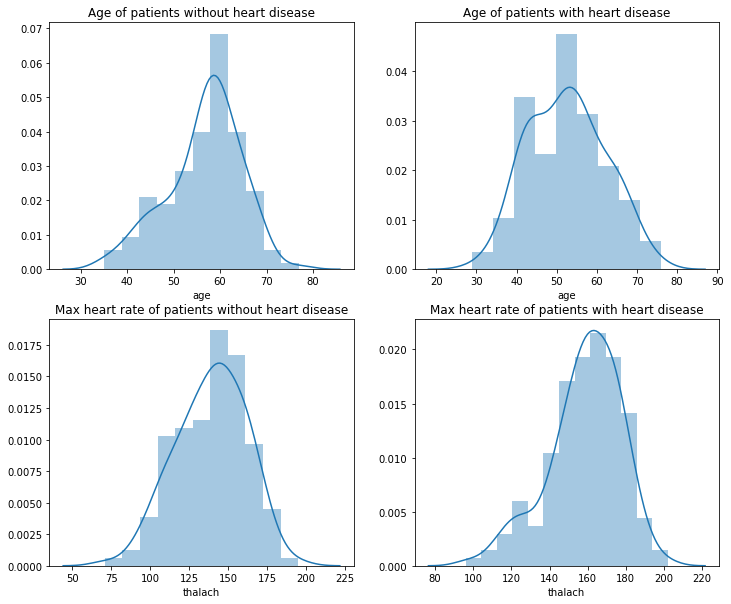

In [102]:
# create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(heart[heart['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(heart[heart['target']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(heart[heart['target']==0].thalach )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(heart[heart['target']==1].thalach )
plt.title('Max heart rate of patients with heart disease')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

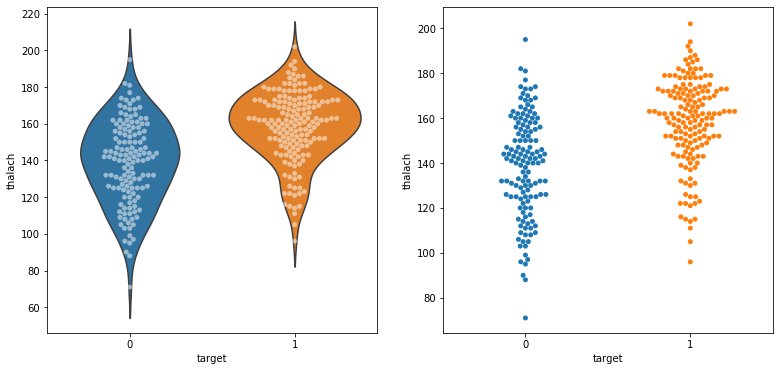

In [103]:
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.violinplot(x="target", y="thalach", data=heart, inner=None)
sns.swarmplot(x="target", y="thalach", data=heart, color='w', alpha=0.5)


plt.subplot(122)
sns.swarmplot(x="target", y="thalach", data=heart)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

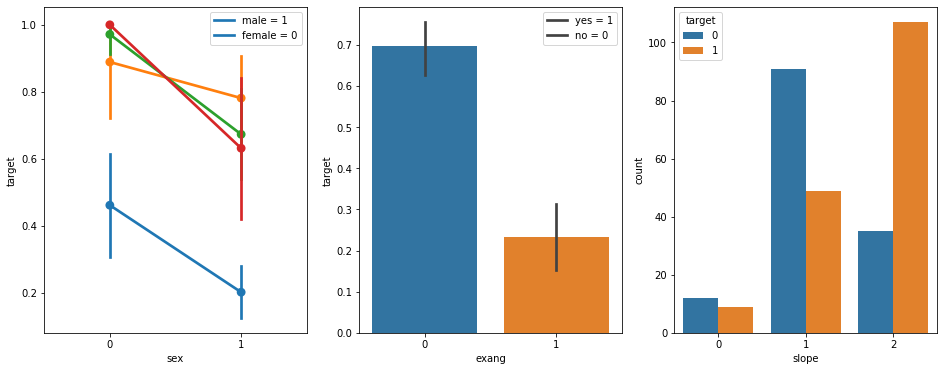

In [104]:
# create pairplot and two barplots
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x="sex", y="target", hue='cp', data=heart)
plt.legend(['male = 1', 'female = 0'])
plt.subplot(132)
sns.barplot(x="exang", y="target", data=heart)
plt.legend(['yes = 1', 'no = 0'])
plt.subplot(133)
sns.countplot(x="slope", hue='target', data=heart)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

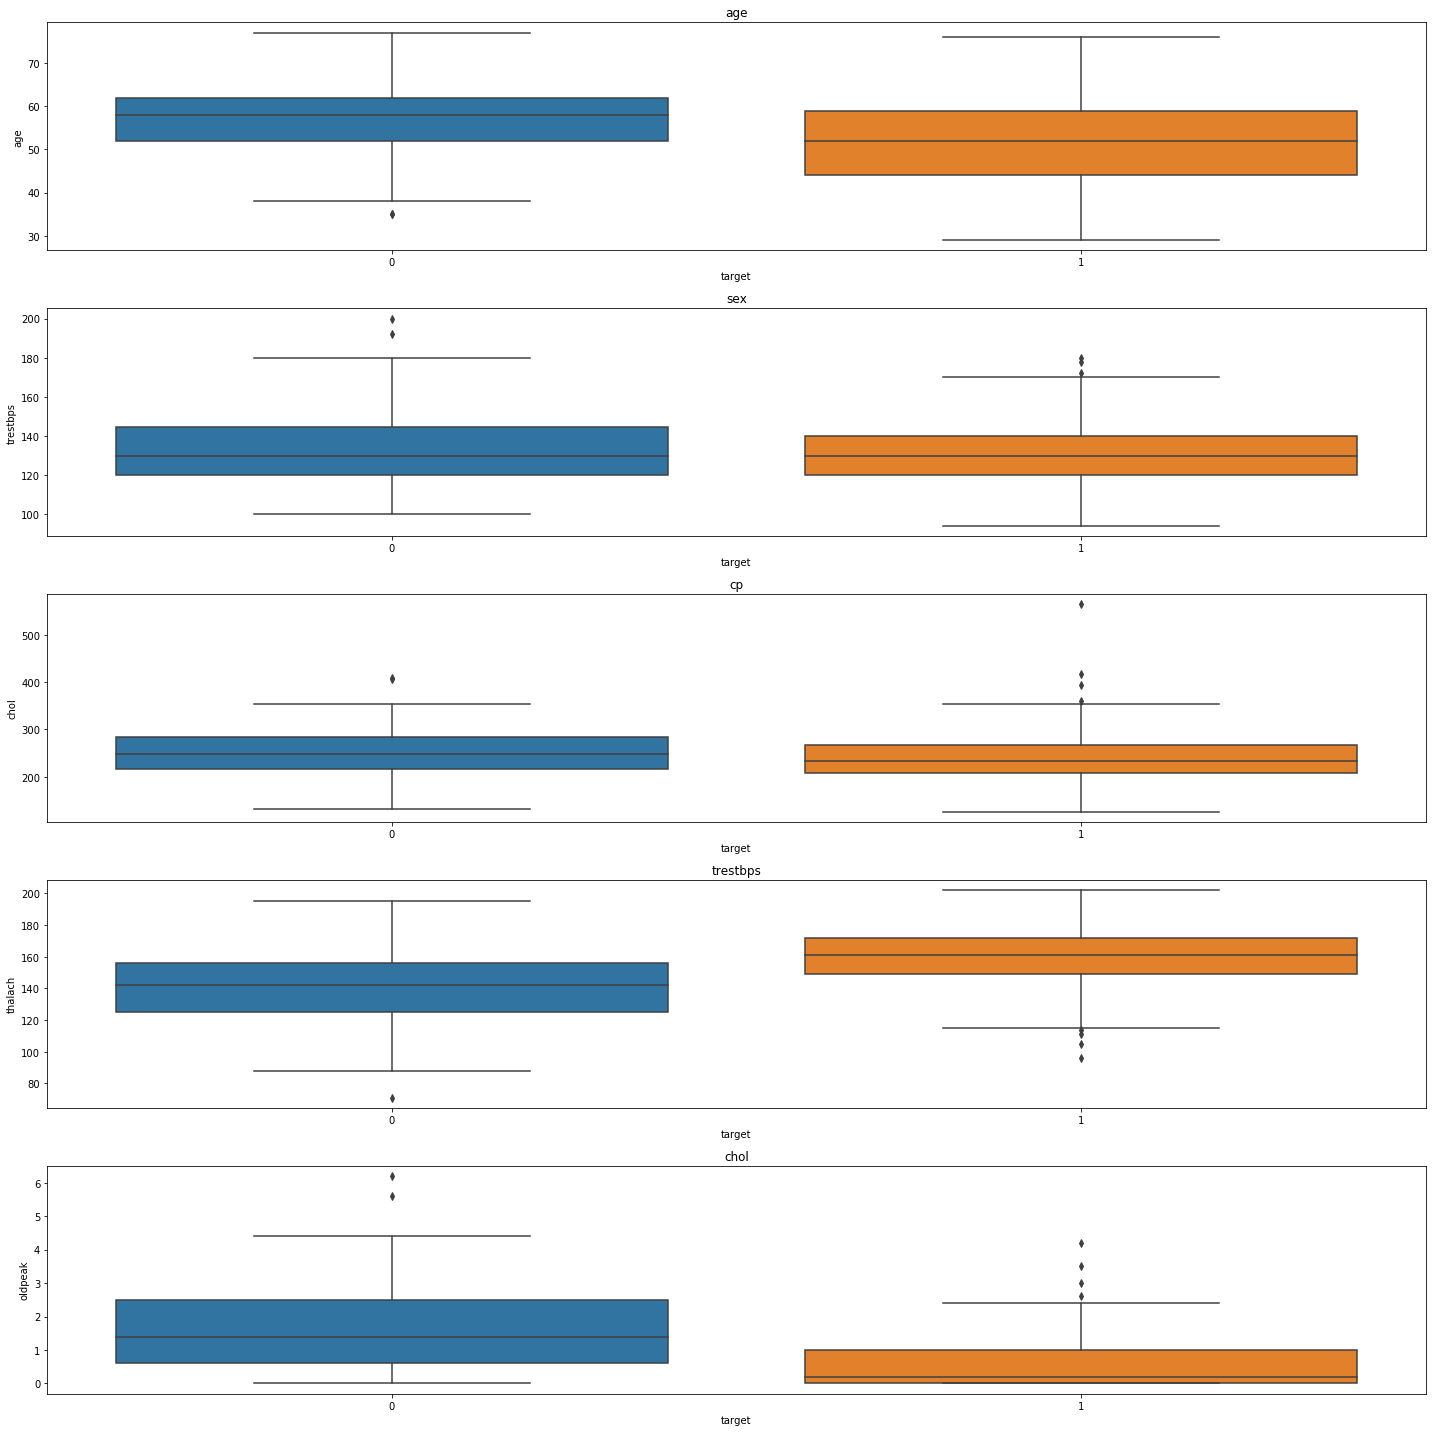

In [113]:
plt.figure(figsize=(20,20))
index=0
for i in range(len(num_features)):
    plt.subplot(5,1,i+1)
    sns.boxplot(heart["target"],heart[num_features[index]])
    plt.title(heart.columns[i])
    index+=1
plt.tight_layout()    

# Data Preprocessing

In [105]:
heart["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [114]:
heart['target'].isnull().sum()

0

In [118]:
(heart['target']==1).sum()

165

In [119]:
(heart['target']==0).sum()

138

In [120]:
heart['target'].unique()

array([1, 0], dtype=int64)

In [121]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [123]:
X= heart.iloc[:,:-1]

In [124]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [125]:
y= heart.iloc[:,-1]

In [126]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [127]:
X.shape

(303, 13)

In [128]:
y.shape

(303,)

In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [131]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)

In [132]:
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (212, 13)
train_set_y shape: (212,)
test_set_x shape: (91, 13)
test_set_y shape: (91,)


In [134]:
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

In [135]:
X_train

array([[-0.14519743, -1.35154233, -0.97043553, ...,  0.98136289,
        -0.67157686, -0.41927286],
       [-0.68904647,  0.73989544,  0.00459922, ..., -2.1949567 ,
        -0.67157686,  1.22676132],
       [ 0.18111199, -1.35154233, -0.97043553, ..., -2.1949567 ,
         1.33369489,  1.22676132],
       ...,
       [-0.47150685, -1.35154233,  0.97963397, ..., -0.6067969 ,
        -0.67157686, -0.41927286],
       [-2.21182377, -1.35154233,  0.00459922, ...,  0.98136289,
        -0.67157686, -0.41927286],
       [ 1.26881006,  0.73989544, -0.97043553, ...,  0.98136289,
         0.33105902, -0.41927286]])

In [136]:
import xgboost 

xg= xgboost.XGBClassifier()

xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [139]:
print("Training Accuracy : ",xg.score(X_train,y_train)*100)
print("Validation Accuracy : ",xg.score(X_test,y_test)*100)

Training Accuracy :  98.58490566037736
Validation Accuracy :  78.02197802197803


In [149]:
from sklearn.neighbors import KNeighborsClassifier

kn= KNeighborsClassifier(n_neighbors=4)

kn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [150]:
print("Training Accuracy : ",kn.score(X_train,y_train)*100)
print("Validation Accuracy : ",kn.score(X_test,y_test)*100)

Training Accuracy :  86.32075471698113
Validation Accuracy :  80.21978021978022


In [151]:
y_pred= kn.predict(X_test)

In [152]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0], dtype=int64)

In [153]:
X_KN=np.array([[63 ,1, 3,145,233,1,0,150,0,2.3,0,0,1]])
X_KN_prediction=kn.predict(X_KN)

In [157]:
X_KN_prediction

array([0], dtype=int64)

In [154]:
def predict(model,data):
    score= model.predict(data)
    if score==1:
        print("You have high chances of Heart Disease")
    else:
        print("You are Safe")

In [156]:
predict(kn,X_KN)

You are Safe


In [159]:
print("Feature importances:\n{}".format(xg.feature_importances_))

Feature importances:
[0.03512278 0.05399795 0.28422603 0.03984935 0.04485911 0.
 0.02683398 0.0478576  0.10064808 0.0504114  0.09454904 0.12870166
 0.09294301]


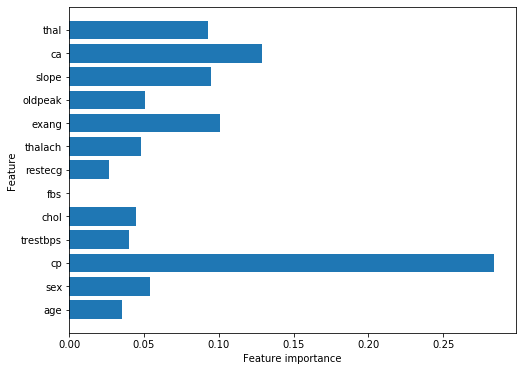

In [161]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 13
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(xg)
plt.savefig('feature_importance')